# Bharat Intern DataScience Project2:Titanic Project

# Titanic Classification :

Make a system which tells whether the person will be save from sinking. What factors were most likely lead to success-socio-economic status, age, gender and more.

Features name: (titanic_train_dataset.csv)

PassengerId:Unique identifier assigned to each passenger.

Survived:Binary variable indicating whether the passenger survived (1) or did not survive (0).

Pclass:Ticket class representing the socio-economic status of the passenger (1st, 2nd, or 3rd class).

Name:Name of the passenger.

Sex:Gender of the passenger.

Age:Age of the passenger.

SibSp:Number of siblings or spouses aboard the Titanic.

Parch:Number of parents or children aboard the Titanic.

Ticket:Ticket number assigned to the passenger.

Fare:The amount of money paid for the ticket.

Cabin:Cabin number where the passenger was assigned.

Embarked:Port of embarkation (C,Q,S).

# Importing All Necessary Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Matplotlib is building the font cache; this may take a moment.


# Importing titanic dataset:

In [2]:
titanic = pd.read_csv('titanic_train_dataset.csv')

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Checking shape of the dataset:
It will give you Number of columns and rows present in the dataset

In [4]:
titanic.shape

(891, 12)

# Finding to see the how many columns present in the dataset:

In [5]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Checking Non-Null Count and Datatype of each column present in the titanic dataset:

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Checking null values present in the titanic dataset columnwise:

In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Checking Type of data present in each column:

In [8]:
titanic.PassengerId.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [9]:
titanic.Survived.unique()

array([0, 1], dtype=int64)

In [10]:
titanic.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [11]:
titanic.Name.unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [12]:
titanic.Sex.unique()

array(['male', 'female'], dtype=object)

In [13]:
titanic.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [14]:
titanic.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [15]:
titanic.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [16]:
titanic.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [17]:
titanic.Fare.unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [18]:
titanic.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [19]:
titanic.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

# Describe the dataset:

In [20]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Finding duplicate rows in Table:

In [21]:
titanic.duplicated().sum()

0

# Removing "Cabin" column,it contains lot of outliers.

In [22]:
titanic.drop(columns=['Cabin'], inplace=True)

# Finding outliers in numeric columns:

In [23]:
#Function to count outliers based on IQR
def count_outliers_iqr(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers.sum()

# Iterate through each column in the DataFrame
for column in titanic.columns:
    if titanic[column].dtype in [np.int64, np.float64]:  # Only consider numerical columns
        total_outliers = count_outliers_iqr(titanic[column])
        print(f"Total outliers in {column}: {total_outliers}")

Total outliers in PassengerId: 0
Total outliers in Survived: 0
Total outliers in Pclass: 0
Total outliers in Age: 11
Total outliers in SibSp: 46
Total outliers in Parch: 213
Total outliers in Fare: 116


# Filling Nulls with median and mode values:

In [24]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

In [25]:
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

# Again checking null values:

In [26]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Distribution of numeric columns:

<Axes: xlabel='Survived', ylabel='Count'>

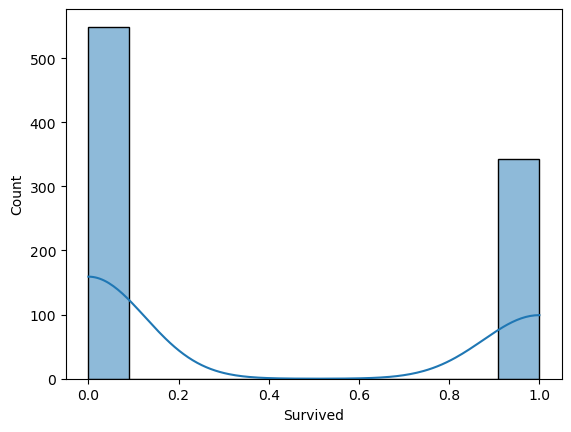

In [27]:
sns.histplot(x = titanic['Survived'],kde = True)

<Axes: xlabel='Pclass', ylabel='Count'>

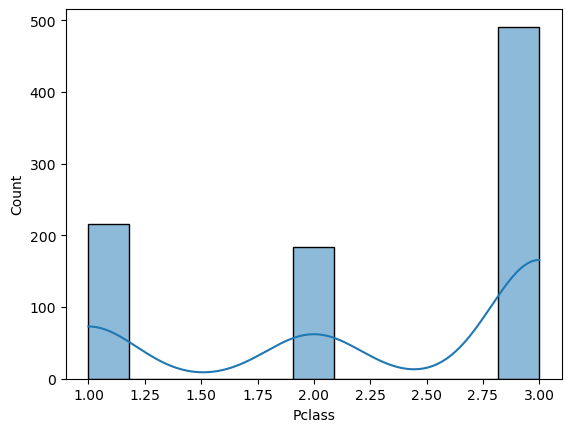

In [28]:
sns.histplot(x = titanic['Pclass'],kde = True)

<Axes: xlabel='Age', ylabel='Count'>

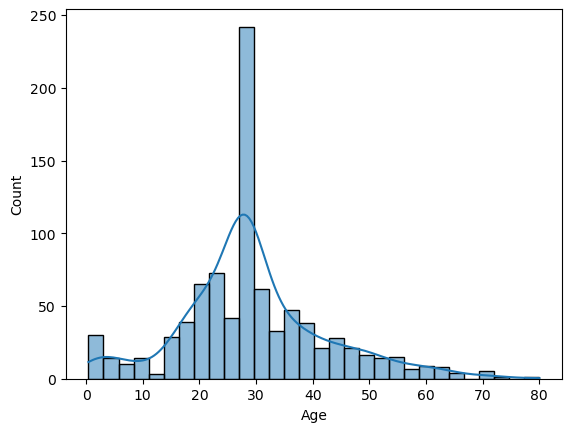

In [29]:
sns.histplot(x = titanic['Age'],kde = True)

<Axes: xlabel='SibSp', ylabel='Count'>

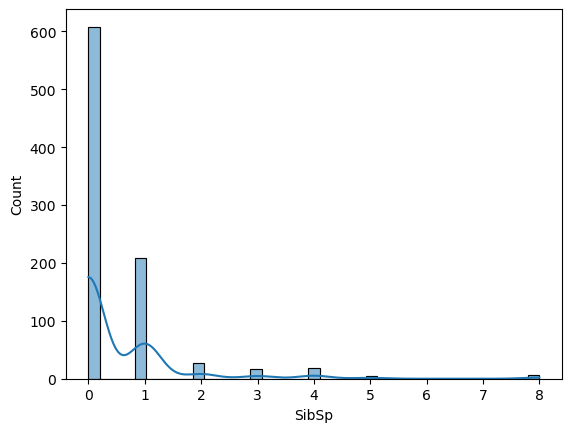

In [30]:
sns.histplot(x = titanic['SibSp'],kde = True)

<Axes: xlabel='Parch', ylabel='Count'>

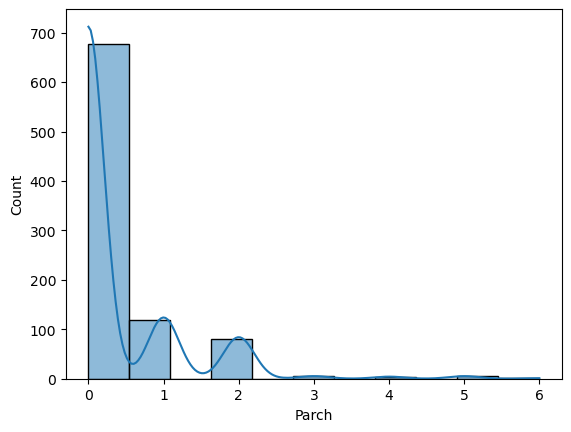

In [31]:
sns.histplot(x = titanic['Parch'],kde = True)

<Axes: xlabel='Fare', ylabel='Count'>

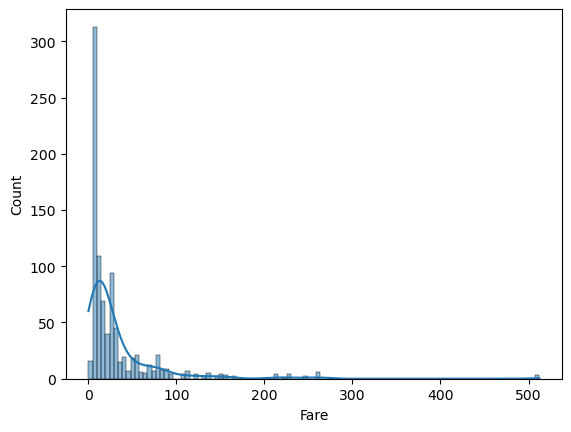

In [32]:
sns.histplot(x = titanic['Fare'],kde = True)

<Axes: >

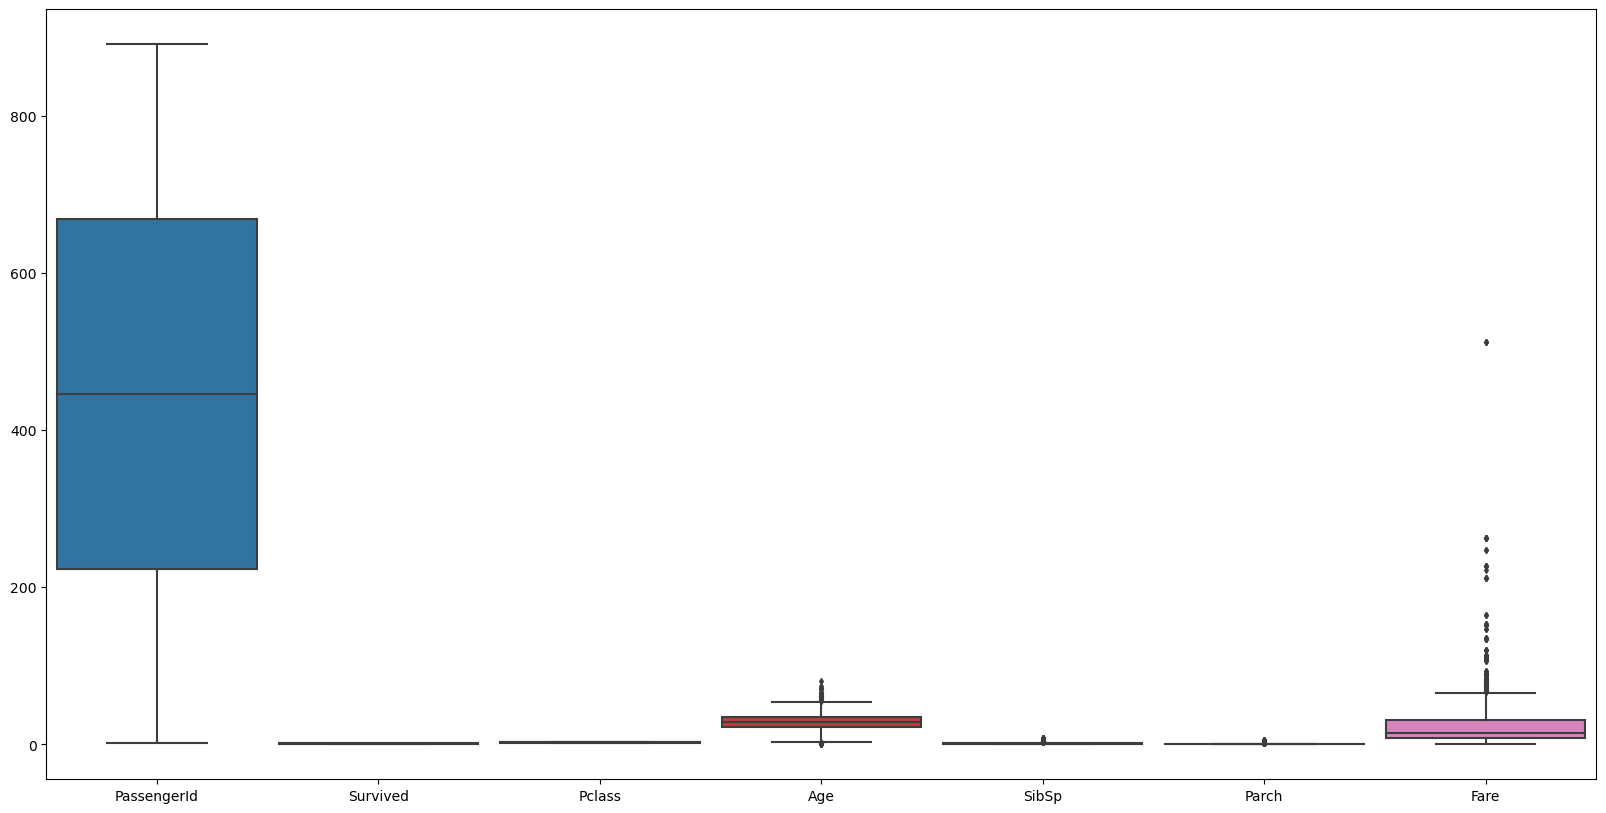

In [33]:
fig,ax = plt.subplots(figsize = (20,10))
sns.boxplot(data = titanic,width = 0.9,fliersize = 3)

# Replacing outliers with median values:

In [34]:
def outlier_removal(titanic, columns):
    for column in columns:
# Calculate the IQR and bounds
        quartiles = np.quantile(titanic[column], [0.25, 0.75])
        iqr = quartiles[1] - quartiles[0]
        upper_bound = quartiles[1] + 1.5 * iqr
        lower_bound = quartiles[0] - 1.5 * iqr

# Replace outliers with median
        median_value = titanic[column].median()
        titanic[column] = np.where((titanic[column] > upper_bound) | (titanic[column] < lower_bound), median_value, titanic[column])

#Replace median value in the respective columns which contain ouliers.
columns_to_remove_outliers = ['Age','SibSp','Parch','Fare']
outlier_removal(titanic, columns_to_remove_outliers)

# after replacing outliers with median values again checking distribution of respective columns:

<Axes: xlabel='Age', ylabel='Count'>

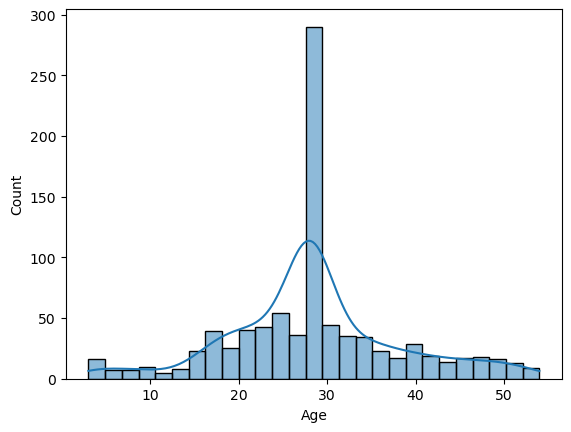

In [35]:
sns.histplot(x = titanic['Age'],kde = True)

<Axes: xlabel='SibSp', ylabel='Count'>

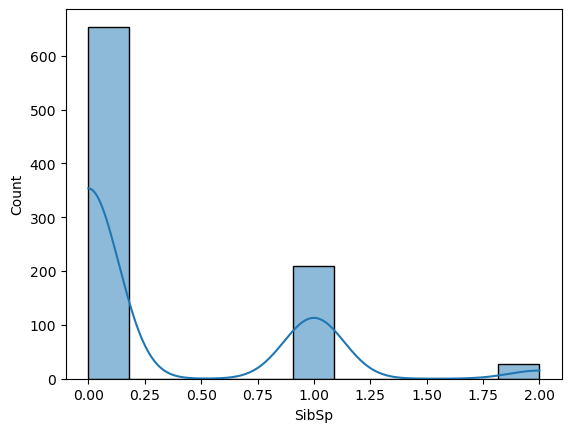

In [36]:
sns.histplot(x = titanic['SibSp'],kde = True)

<Axes: xlabel='Parch', ylabel='Count'>

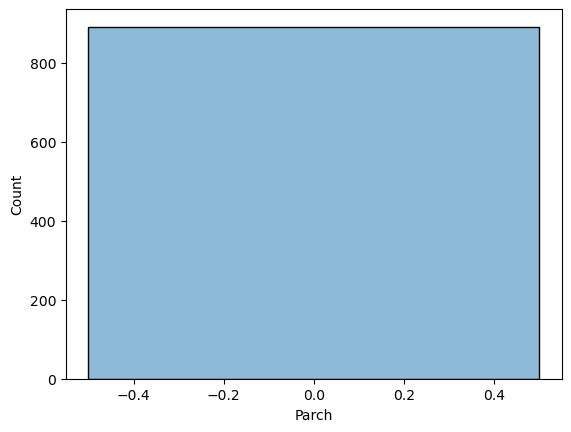

In [37]:
sns.histplot(x = titanic['Parch'],kde = True)

<Axes: xlabel='Fare', ylabel='Count'>

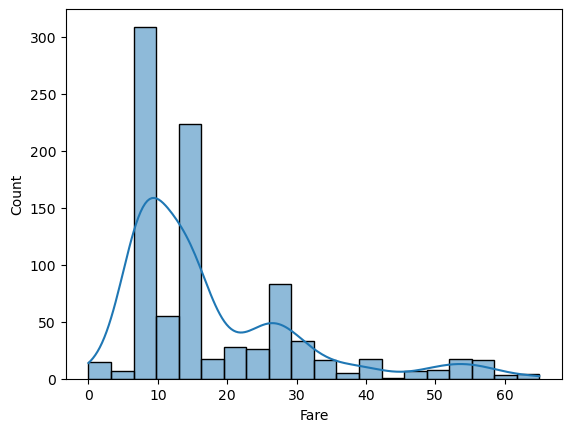

In [38]:
sns.histplot(x = titanic['Fare'],kde = True)

# Checking zeros in the dataset columnwise:

In [39]:
# Sum of counts of zeros for each column
zeros_sum = (titanic == 0).sum()

print(zeros_sum)

PassengerId      0
Survived       549
Pclass           0
Name             0
Sex              0
Age              0
SibSp          654
Parch          891
Ticket           0
Fare            15
Embarked         0
dtype: int64


# Replacing zero with median value:

In [40]:
titanic['Fare'] = titanic['Fare'].replace(0, titanic['Fare'].median())

# Again checking is zero values are present in the dataset after replacing:

In [41]:
zeros_sum = (titanic == 0).sum()

print(zeros_sum)

PassengerId      0
Survived       549
Pclass           0
Name             0
Sex              0
Age              0
SibSp          654
Parch          891
Ticket           0
Fare             0
Embarked         0
dtype: int64


# Selecting Indepenent variables:

In [42]:
X = titanic[['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked']]
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,14.4542,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0.0,0.0,211536,13.0000,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0.0,0.0,112053,30.0000,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1.0,0.0,W./C. 6607,23.4500,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0.0,0.0,111369,30.0000,C


# performing Log Transformation Sqrt Transformation and to get the Normalization of Skewed Data:

In [43]:
X['Age'] = np.log(X['Age'])

C:\Users\Chiluca Shiva Kumar\AppData\Local\Temp\ipykernel_14068\2363500570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = np.log(X['Age'])


In [44]:
X['SibSp'] = np.sqrt(X['SibSp'])

C:\Users\Chiluca Shiva Kumar\AppData\Local\Temp\ipykernel_14068\3898800748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SibSp'] = np.sqrt(X['SibSp'])


In [45]:
X['Parch'] = np.sqrt(X['Parch'])

C:\Users\Chiluca Shiva Kumar\AppData\Local\Temp\ipykernel_14068\1233085842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Parch'] = np.sqrt(X['Parch'])


In [46]:
X['Fare'] = np.log(X['Fare'])

C:\Users\Chiluca Shiva Kumar\AppData\Local\Temp\ipykernel_14068\3270755416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Fare'] = np.log(X['Fare'])


In [47]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,3.091042,1.0,0.0,A/5 21171,1.981001,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.637586,1.0,0.0,PC 17599,2.670985,C
2,3,3,"Heikkinen, Miss. Laina",female,3.258097,0.0,0.0,STON/O2. 3101282,2.070022,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.555348,1.0,0.0,113803,3.972177,S
4,5,3,"Allen, Mr. William Henry",male,3.555348,0.0,0.0,373450,2.085672,S
...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,3.295837,0.0,0.0,211536,2.564949,S
887,888,1,"Graham, Miss. Margaret Edith",female,2.944439,0.0,0.0,112053,3.401197,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,3.332205,1.0,0.0,W./C. 6607,3.154870,S
889,890,1,"Behr, Mr. Karl Howell",male,3.258097,0.0,0.0,111369,3.401197,C


# Performing Dummy Encoding for Categorical data columns:

In [48]:
X = pd.get_dummies(X,columns=['Name','Sex','Ticket','Embarked'])
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,1,3,3.091042,1.0,0.0,1.981001,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,3.637586,1.0,0.0,2.670985,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,3,3,3.258097,0.0,0.0,2.070022,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1,3.555348,1.0,0.0,3.972177,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,3,3.555348,0.0,0.0,2.085672,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,3.295837,0.0,0.0,2.564949,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
887,888,1,2.944439,0.0,0.0,3.401197,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
888,889,3,3.332205,1.0,0.0,3.154870,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
889,890,1,3.258097,0.0,0.0,3.401197,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


# Performing StandardScaling:

In [49]:
columns_to_scale = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

scaler = StandardScaler()
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

In [50]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,1,0.827377,-0.397836,1.538653,0.0,-1.153247,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,-1.566107,0.815995,1.538653,0.0,-0.002385,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,3,0.827377,-0.026822,-0.595431,0.0,-1.004765,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,-1.566107,0.633351,1.538653,0.0,2.167946,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0.827377,0.633351,-0.595431,0.0,-0.978661,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,-0.369365,0.056997,-0.595431,0.0,-0.179248,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
887,888,-1.566107,-0.723431,-0.595431,0.0,1.215577,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
888,889,0.827377,0.137766,1.538653,0.0,0.804714,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
889,890,-1.566107,-0.026822,-0.595431,0.0,1.215577,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [51]:
y = titanic[['Survived']]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


# Split the dataset into X_train, X_test, y_train, y_test:

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [53]:
X_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
105,106,0.827377,0.137766,-0.595431,0.0,-1.010922,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
68,69,0.827377,-0.970454,-0.595431,0.0,-1.004765,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
253,254,0.827377,0.290994,1.538653,0.0,0.177478,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
320,321,0.827377,-0.397836,-0.595431,0.0,-1.153247,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
706,707,-0.369365,1.191501,-0.595431,0.0,-0.116299,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,836,-1.566107,0.873685,1.538653,0.0,-0.002385,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
192,193,0.827377,-0.723431,1.538653,0.0,-1.019733,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
629,630,0.827377,0.137766,-0.595431,0.0,-1.045607,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
559,560,0.827377,0.695916,1.538653,0.0,0.306996,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [54]:
X_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
495,496,0.827377,0.137766,-0.595431,0.0,-0.001912,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
648,649,0.827377,0.137766,-0.595431,0.0,-1.085618,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
278,279,0.827377,-2.941086,-0.595431,0.0,1.166205,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
31,32,-1.566107,0.137766,1.538653,0.0,-0.002385,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
255,256,0.827377,0.215701,-0.595431,0.0,0.086549,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,168,0.827377,1.191501,1.538653,0.0,1.094532,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
306,307,-1.566107,0.137766,-0.595431,0.0,-0.002385,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
379,380,0.827377,-0.723431,-0.595431,0.0,-1.036637,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
742,743,-1.566107,-0.501153,2.422620,0.0,-0.002385,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [55]:
y_train

,Survived
105,0
68,1
253,0
320,0
706,1
...,...
835,1
192,1
629,0
559,1


In [56]:
y_test

,Survived
495,0
648,0
278,0
31,1
255,1
...,...
167,0
306,1
379,0
742,1


# 1)LogisticRegression:

In [57]:
# Initialize your model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = model.predict(X_train)

# Make predictions on the testing set
test_predictions = model.predict(X_test)

# Calculate training accuracy
LogisticRegression_train_accuracy = accuracy_score(y_train, train_predictions)
print(f'Training Accuracy: {LogisticRegression_train_accuracy}')

# Calculate testing accuracy
LogisticRegression_test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Testing Accuracy: {LogisticRegression_test_accuracy}')

# Confusion matrix and classification report for training data
print("Confusion Matrix (Training Data):")
print(confusion_matrix(y_train, train_predictions))

print("\nClassification Report (Training Data):")
print(classification_report(y_train, train_predictions))

# Confusion matrix and classification report for testing data
print("\nConfusion Matrix (Testing Data):")
print(confusion_matrix(y_test, test_predictions))

print("\nClassification Report (Testing Data):")
print(classification_report(y_test, test_predictions))

C:\Users\Chiluca Shiva Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 0.8967065868263473
Testing Accuracy: 0.820627802690583
Confusion Matrix (Training Data):
[[392  18]
 [ 51 207]]

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       410
           1       0.92      0.80      0.86       258

    accuracy                           0.90       668
   macro avg       0.90      0.88      0.89       668
weighted avg       0.90      0.90      0.90       668


Confusion Matrix (Testing Data):
[[119  20]
 [ 20  64]]

Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       139
           1       0.76      0.76      0.76        84

    accuracy                           0.82       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.82      0.82      0.82       223



C:\Users\Chiluca Shiva Kumar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 2)Support Vector Machine:

In [60]:
# Initialize your model
model = svm.SVC(kernel='linear')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = model.predict(X_train)

# Make predictions on the testing set
test_predictions = model.predict(X_test)

# Calculate training accuracy
SVM_train_accuracy = accuracy_score(y_train, train_predictions)
print(f'Training Accuracy: {SVM_train_accuracy}')

# Calculate testing accuracy
SVM_test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Testing Accuracy: {SVM_test_accuracy}')
# Confusion matrix and classification report for training data
print("Confusion Matrix (Training Data):")
print(confusion_matrix(y_train, train_predictions))

print("\nClassification Report (Training Data):")
print(classification_report(y_train, train_predictions))

# Confusion matrix and classification report for testing data
print("\nConfusion Matrix (Testing Data):")
print(confusion_matrix(y_test, test_predictions))

print("\nClassification Report (Testing Data):")
print(classification_report(y_test, test_predictions))

C:\Users\Chiluca Shiva Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 0.9985029940119761
Testing Accuracy: 0.8251121076233184
Confusion Matrix (Training Data):
[[410   0]
 [  1 257]]

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       410
           1       1.00      1.00      1.00       258

    accuracy                           1.00       668
   macro avg       1.00      1.00      1.00       668
weighted avg       1.00      1.00      1.00       668


Confusion Matrix (Testing Data):
[[119  20]
 [ 19  65]]

Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       139
           1       0.76      0.77      0.77        84

    accuracy                           0.83       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.83      0.83      0.83       223



# 3)RandomForestClassifier:

In [59]:
#Fitting Decision Tree classifier to the training set
from sklearn.ensemble import RandomForestClassifier
# Initialize your model (in this example, RandomForestClassifier is used)
model = RandomForestClassifier(n_estimators= 9, criterion="entropy")

# Initialize your model (in this example, RandomForestClassifier is used)
model = RandomForestClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = model.predict(X_train)

# Make predictions on the testing set
test_predictions = model.predict(X_test)

# Calculate training accuracy
Random_Forest_train_accuracy = accuracy_score(y_train, train_predictions)
print(f'Training Accuracy: {Random_Forest_train_accuracy}')

# Calculate testing accuracy
Random_Forest_test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Testing Accuracy: {Random_Forest_test_accuracy}')

# Confusion matrix and classification report for training data
print("Confusion Matrix (Training Data):")
print(confusion_matrix(y_train, train_predictions))

print("\nClassification Report (Training Data):")
print(classification_report(y_train, train_predictions))

# Confusion matrix and classification report for testing data
print("\nConfusion Matrix (Testing Data):")
print(confusion_matrix(y_test, test_predictions))

print("\nClassification Report (Testing Data):")
print(classification_report(y_test, test_predictions))

C:\Users\Chiluca Shiva Kumar\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training Accuracy: 1.0
Testing Accuracy: 0.8251121076233184
Confusion Matrix (Training Data):
[[410   0]
 [  0 258]]

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       410
           1       1.00      1.00      1.00       258

    accuracy                           1.00       668
   macro avg       1.00      1.00      1.00       668
weighted avg       1.00      1.00      1.00       668


Confusion Matrix (Testing Data):
[[127  12]
 [ 27  57]]

Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.82      0.91      0.87       139
           1       0.83      0.68      0.75        84

    accuracy                           0.83       223
   macro avg       0.83      0.80      0.81       223
weighted avg       0.83      0.83      0.82       223



# 4)GradientBoostingClassifier:

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize your model (in this example, GradientBoostingClassifier is used)
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = model.predict(X_train)

# Make predictions on the testing set
test_predictions = model.predict(X_test)

# Calculate training accuracy
GradientBoosting_train_accuracy = accuracy_score(y_train, train_predictions)
print(f'Training Accuracy: {GradientBoosting_train_accuracy}')

# Calculate testing accuracy
GradientBoosting_test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Testing Accuracy: {GradientBoosting_test_accuracy}')
# Confusion matrix and classification report for training data
print("Confusion Matrix (Training Data):")
print(confusion_matrix(y_train, train_predictions))

print("\nClassification Report (Training Data):")
print(classification_report(y_train, train_predictions))

# Confusion matrix and classification report for testing data
print("\nConfusion Matrix (Testing Data):")
print(confusion_matrix(y_test, test_predictions))

print("\nClassification Report (Testing Data):")
print(classification_report(y_test, test_predictions))

C:\Users\Chiluca Shiva Kumar\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 0.8532934131736527
Testing Accuracy: 0.8116591928251121
Confusion Matrix (Training Data):
[[391  19]
 [ 79 179]]

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       410
           1       0.90      0.69      0.79       258

    accuracy                           0.85       668
   macro avg       0.87      0.82      0.84       668
weighted avg       0.86      0.85      0.85       668


Confusion Matrix (Testing Data):
[[126  13]
 [ 29  55]]

Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       139
           1       0.81      0.65      0.72        84

    accuracy                           0.81       223
   macro avg       0.81      0.78      0.79       223
weighted avg       0.81      0.81      0.81       223



# All Models Training accuracy and Testing accuracy

In [62]:
# Print the results
print("Logistic Regression:")
print(f'Training Accuracy: {LogisticRegression_train_accuracy}')
print(f'Testing Accuracy: {LogisticRegression_test_accuracy}\n')

print("SVM:")
print(f'Training Accuracy: {SVM_train_accuracy}')
print(f'Testing Accuracy: {SVM_test_accuracy}\n')

print("Random Forest:")
print(f'Training Accuracy: {Random_Forest_train_accuracy}')
print(f'Testing Accuracy: {Random_Forest_test_accuracy}\n')

print("Gradient Boosting:")
print(f'Training Accuracy: {GradientBoosting_train_accuracy}')
print(f'Testing Accuracy: {GradientBoosting_test_accuracy}\n')

Logistic Regression:
Training Accuracy: 0.8967065868263473
Testing Accuracy: 0.820627802690583

SVM:
Training Accuracy: 0.9985029940119761
Testing Accuracy: 0.8251121076233184

Random Forest:
Training Accuracy: 1.0
Testing Accuracy: 0.8251121076233184

Gradient Boosting:
Training Accuracy: 0.8532934131736527
Testing Accuracy: 0.8116591928251121

